# Taller: Análisis de Instagram con Apify API + Gemini  

Fecha de generación: 2025-05-21


**Objetivos**

1. Obtener datos públicos de Instagram usando el actor **`apify/instagram-api-scraper`**.  
2. Limpiar y pre‑procesar captions e información de posts (descriptiva de los captions).  
3. Clasificar sentimiento de captions con la API de Google Generative AI (Gemini).  
4. Extraer temas dominantes con LDA y nombrarlos con Gemini. Crear Prompt
6. Diseñar una micro‑campaña basada en los insights descubiertos.


In [3]:
import pandas as pd
import requests
import google.generativeai as palm

In [4]:
# 🔑 Introduce tu token de Apify y de Google Generative AI (Gemini)
import os

In [5]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/TercerCorte/instagram_disney.csv

--2025-11-27 22:23:10--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/TercerCorte/instagram_disney.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/TercerCorte/instagram_disney.csv [following]
--2025-11-27 22:23:11--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/TercerCorte/instagram_disney.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10377469 (9.9M) [text/plain]
Saving to: ‘instagram_disney.csv’

instagram_disney.cs 100%[===================>]   9

In [6]:
import pandas as pd

df = pd.read_csv("instagram_disney.csv")

In [7]:
df

,inputUrl,id,username,url,fullName,biography,externalUrls,followersCount,followsCount,hasChannel,...,videoDuration,musicInfo.artist_name,musicInfo.song_name,musicInfo.uses_original_audio,musicInfo.should_mute_audio,musicInfo.should_mute_audio_reason,musicInfo.audio_id,taggedUsers,coauthorProducers,isPinned
0,https://www.instagram.com/disneylat/,3626608212947059675,disneylat,https://www.instagram.com/p/DJUTPSAOUPb/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.instagram.com/disneylat/,3636752063146304692,disneylat,https://www.instagram.com/p/DJ4VrusASS0/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.instagram.com/disneylat/,3629059382491345626,disneylat,https://www.instagram.com/p/DJdAkfiMfLa/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,59.179,sacqspot,Original audio,True,False,NaN,6.053466e+14,NaN,NaN,NaN
3,https://www.instagram.com/disneylat/,3624961017727223603,disneylat,https://www.instagram.com/p/DJOctb6RQcz/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.instagram.com/disneylat/,3634637246638652679,disneylat,https://www.instagram.com/p/DJw01GVTP0H/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,https://www.instagram.com/disneylat/,3378657362149709028,disneylat,https://www.instagram.com/p/C7jZvhQsRTk/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,115.115,disneyprincesala,Original audio,True,False,NaN,9.840821e+14,"[{'full_name': 'Disney', 'id': '2957422264', '...","[{'id': '2957422264', 'is_verified': True, 'pr...",NaN
196,https://www.instagram.com/disneylat/,3333366985910424893,disneylat,https://www.instagram.com/p/C5Cf5zdNJU9/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,https://www.instagram.com/disneylat/,3331639585011555501,disneylat,https://www.instagram.com/p/C48XI0APlyt/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,https://www.instagram.com/disneylat/,3329464423368675903,disneylat,https://www.instagram.com/p/C40okC3MNI_/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



### 🔍 Preguntas – Sección 1 (Exploración)
Mire las columnas de su dataset y responda
1. ¿Cuántos posts hay en total?  
2. ¿Qué tipos de contenido (imagen, vídeo, carrusel) predominan?  (mira la columna type)
3. ¿Cuál es el rango de fechas cubierto por los posts?  
4. ¿Qué post obtuvo más 'likes' y cuál crees que es la razón?


In [8]:
total_posts = len(df)
print(f"1. Total de posts: {total_posts}")

1. Total de posts: 200


In [12]:
df['type'].value_counts()

,count
type,
Video,83
Sidecar,67
Image,50


In [14]:
df["date"] =pd.to_datetime(df["timestamp"])

In [15]:
df["date"].max()

Timestamp('2025-05-20 21:00:01+0000', tz='UTC')

In [16]:
df["date"].min()

Timestamp('2024-03-16 17:00:01+0000', tz='UTC')

In [17]:
df["likesCount"].sort_values(ascending=False)

,likesCount
85,558944
156,186613
109,136515
176,84230
167,81218
...,...
135,282
182,233
38,223
46,219


In [18]:
df[df["likesCount"] == df["likesCount"].max()]

,inputUrl,id,username,url,fullName,biography,externalUrls,followersCount,followsCount,hasChannel,...,musicInfo.artist_name,musicInfo.song_name,musicInfo.uses_original_audio,musicInfo.should_mute_audio,musicInfo.should_mute_audio_reason,musicInfo.audio_id,taggedUsers,coauthorProducers,isPinned,date
85,https://www.instagram.com/disneylat/,3506371026641991220,disneylat,https://www.instagram.com/p/DCpId8Ft7Y0/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,disneylat,Original audio,True,False,NaN,1.920758e+15,NaN,NaN,NaN,2024-11-21 21:00:02+00:00



## 🧹 Sección 2 (Limpieza)

Explica por qué es importante limpiar y normalizar el texto de los captions.  
Entregue un grafico de barras con las frecuencia en los captions

Es importante limpiar los captions para poder identificar los patrones que existen y ver el tipo de contenido que funciona y que puede tener mayor afinidad con el usuario. Al normalizar el texto, el análisis puede tener una mayor eficiencia, ya que se puede ser más claro en lo que se transmite a la hora de que una inteligencia o apps puedan evaluar

In [19]:
import re, nltk, string
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_caption(text):
    text = text.lower()
    text = re.sub(r"http\S+", " ", text)        # URLs
    text = re.sub(r"@[\w_]+", " ", text)        # Menciones
    text = re.sub(r"[#]", " ", text)             # Hashtags (opcional: conservar)
    text = re.sub(r"[{}]".format(string.punctuation), " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['caption_clean'] = df['caption'].fillna("").apply(clean_caption)
df[['caption', 'caption_clean']].head(100)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,caption,caption_clean
0,"En cada imagen se esconde un Mickey, ¿puedes e...",en cada imagen se esconde un mickey ¿puedes en...
1,Esto se va a descontrolar.,esto se va a descontrolar
2,Los 2000 hechos canción. \n\nVuelve a ver #Liz...,los 2000 hechos canción vuelve a ver lizziemcg...
3,Con ser ella misma alcanzaba 🥹\n\n#Mulán dispo...,con ser ella misma alcanzaba 🥹 mulán disponibl...
4,"Llevábamos años esperando este momento, y no d...",llevábamos años esperando este momento y no de...
...,...,...
95,"Gracias, Walt 💖.\n\n#HabíaUnaVezUnEstudio, dis...",gracias walt 💖 habíaunavezunestudio disponible en
96,"Ya sabes qué hacer.\n\n#AgathaEnTodasPartes, t...",ya sabes qué hacer agathaentodaspartes todos l...
97,¡Desliza para unirte a la fiesta y desearle un...,¡desliza para unirte a la fiesta y desearle un...
98,Sabemos que Hades no es precisamente conocido ...,sabemos que hades no es precisamente conocido ...


In [20]:
from collections import Counter
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter

import nltk
nltk.download('stopwords')
stopwords = set(stopwords.words('spanish'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^a-záéíóúüñ ]', '', texto)
    palabras = [palabra for palabra in texto.split() if palabra not in stopwords]
    return " ".join(palabras)

In [22]:
df['clean_text'] = df['caption_clean'].apply(limpiar_texto)

In [23]:
todas_palabras = "".join(df ["clean_text"]).split()
frecuencias = Counter(todas_palabras)

freq_df = pd.DataFrame(frecuencias.items(), columns=["palabra", "frecuencia"])
freq_df = freq_df.sort_values(by="frecuencia", ascending=False).head(20)

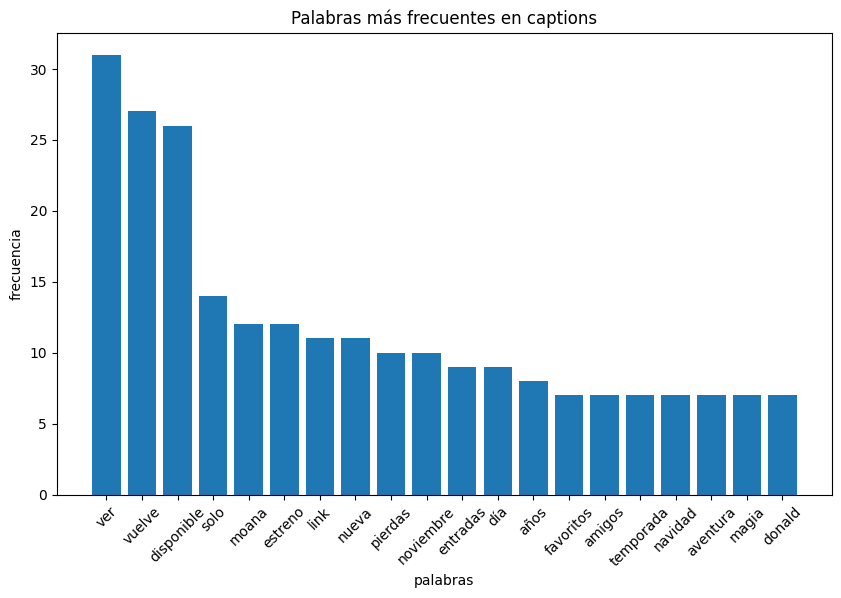

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(freq_df["palabra"], freq_df["frecuencia"])
plt.xticks(rotation=45)
plt.title("Palabras más frecuentes en captions")
plt.xlabel("palabras")
plt.ylabel("frecuencia")
plt.show()


## 🗂 Sección 3 (Temas)
5. Pida a chatgpt o a una IA que le de 3 temas para clasificar un caption y denle un ejemplo.
6. Escriba un prompt en donde le pida clasificar un caption y que de respuesta solo regrese una palabra.
7. Apliquelo en toda la columna caption creando una columna topics.

10. Lista los nombres de los temas generados. ¿Alguno es inesperado?  
11. Con un heatmap *tipo de contenido × tema*, indica qué tema es “propiedad” de cada formato.  
12. Para el tema dominante, proporciona dos insights accionables.


In [25]:
df.head()

,inputUrl,id,username,url,fullName,biography,externalUrls,followersCount,followsCount,hasChannel,...,musicInfo.uses_original_audio,musicInfo.should_mute_audio,musicInfo.should_mute_audio_reason,musicInfo.audio_id,taggedUsers,coauthorProducers,isPinned,date,caption_clean,clean_text
0,https://www.instagram.com/disneylat/,3626608212947059675,disneylat,https://www.instagram.com/p/DJUTPSAOUPb/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-06 15:30:13+00:00,en cada imagen se esconde un mickey ¿puedes en...,cada imagen esconde mickey puedes encontrarlos...
1,https://www.instagram.com/disneylat/,3636752063146304692,disneylat,https://www.instagram.com/p/DJ4VrusASS0/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-20 21:00:01+00:00,esto se va a descontrolar,va descontrolar
2,https://www.instagram.com/disneylat/,3629059382491345626,disneylat,https://www.instagram.com/p/DJdAkfiMfLa/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,True,False,NaN,6.053466e+14,NaN,NaN,NaN,2025-05-10 16:30:03+00:00,los 2000 hechos canción vuelve a ver lizziemcg...,hechos canción vuelve ver lizziemcguire estrel...
3,https://www.instagram.com/disneylat/,3624961017727223603,disneylat,https://www.instagram.com/p/DJOctb6RQcz/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-04 22:00:01+00:00,con ser ella misma alcanzaba 🥹 mulán disponibl...,ser misma alcanzaba mulán disponible solo
4,https://www.instagram.com/disneylat/,3634637246638652679,disneylat,https://www.instagram.com/p/DJw01GVTP0H/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-18 15:30:01+00:00,llevábamos años esperando este momento y no de...,llevábamos años esperando momento decepcionó v...


In [26]:
import requests
import json

In [34]:
import os
os.environ["OPENAI_API_KEY"] = ""

from openai import OpenAI

client = OpenAI()

In [28]:
from openai import OpenAI

client = OpenAI()


In [29]:
def suma(a,b):
 return a+b

In [30]:
suma(5,10)

15

In [31]:
def call_llm(prompt):
  response = client.responses.create(
  model="gpt-4o-mini",
  input=prompt
)
  return response.output_text



In [37]:
call_llm("dame tres temas para clasificar un caption y dame un ejemplo ")

'Claro, aquí tienes tres temas para clasificar un caption, junto con un ejemplo para cada uno:\n\n### 1. **Inspiración**\n   - **Ejemplo:** "Cada día es una nueva oportunidad para escribir tu propia historia. ✨ #Inspírate"\n\n### 2. **Aventura**\n   - **Ejemplo:** "Explorando nuevos horizontes y creando recuerdos inolvidables. 🌍✈️ #Aventura"\n\n### 3. **Amistad**\n   - **Ejemplo:** "La verdadera riqueza está en los momentos compartidos con amigos. ❤️ #Amistad"\n\nSi necesitas más ejemplos o alguna otra clasificación, ¡avísame!'

In [45]:
def classify_topics(text):
  prompt = (f"Clasifica por tematicas el siguiente caption:{text} "
              f"solo tienes entre estos temas Inspiración , Aventura , Amistad solo responde con una palabra")
  try:
    respuesta = call_llm(prompt)
  except:
    respuesta = "deafult"
  return respuesta

In [46]:
sample = df.sample(10, replace = True, random_state=42)
sample['topic'] = sample['caption_clean'].apply(classify_topics)

In [47]:
sample['topic'].value_counts()

,count
topic,
Aventura,5
Amistad,3
Inspiración,2


<Axes: xlabel='type', ylabel='topic'>

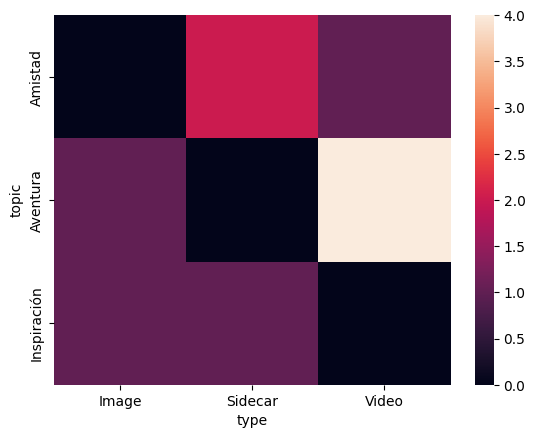

In [48]:
import seaborn as sns
sns.heatmap(pd.crosstab(sample["topic"],sample["type"]))

In [49]:
call_llm("ayúdame a crear dos insight para el tema dominante, según el gráfico el tema dominante es Aventura")

'Claro, aquí tienes dos insights sobre el tema dominante de "Aventura":\n\n1. **Búsqueda de Conexión Personal**: Las experiencias de aventura no solo son vistas como una forma de entretenimiento, sino también como una oportunidad para la autoconexión y el autodescubrimiento. La gente busca actividades aventureras que les permitan escapar de la rutina diaria, explorar sus límites y descubrir nuevas facetas de sí mismos.\n\n2. **Valor de la Experiencia Compartida**: La aventura se percibe como una forma valiosa de fortalecimiento de relaciones. Las actividades al aire libre o emocionantes son más atractivas cuando se comparten con amigos o familiares, lo que resalta la importancia de crear recuerdos significativos juntos. Esto sugiere que las marcas y empresas podrían enfocar sus estrategias en fomentar experiencias grupales que unan a las personas a través de la aventura.\n\nSi necesitas más detalles o enfoques, ¡dímelo!'



## 📝 Sección 4 (Micro‑campaña)

Cree una columna para una publicidad especifica:


In [50]:
import pandas as pd

# Lista de diccionarios con la información
datos = [
    {"Nombre": "Ana Torres", "Personaje de Interés": "Estudiante universitaria", "Rango de Edad": "18-24", "Producto a Vender": "Laptop económica"},
    {"Nombre": "Carlos Pérez", "Personaje de Interés": "Emprendedor digital", "Rango de Edad": "25-34", "Producto a Vender": "Software de productividad"},
    {"Nombre": "Lucía Gómez", "Personaje de Interés": "Madre primeriza", "Rango de Edad": "25-34", "Producto a Vender": "Pañales ecológicos"},
    {"Nombre": "Marco Díaz", "Personaje de Interés": "Gamer profesional", "Rango de Edad": "18-24", "Producto a Vender": "Silla ergonómica para gaming"},
    {"Nombre": "Teresa Ríos", "Personaje de Interés": "Ejecutiva de marketing", "Rango de Edad": "35-44", "Producto a Vender": "Cursos de liderazgo online"},
    {"Nombre": "Andrés López", "Personaje de Interés": "Jubilado activo", "Rango de Edad": "65-74", "Producto a Vender": "Viajes culturales guiados"},
    {"Nombre": "Valentina Cruz", "Personaje de Interés": "Influencer de moda", "Rango de Edad": "18-24", "Producto a Vender": "Ropa de diseñador"},
    {"Nombre": "Roberto Silva", "Personaje de Interés": "Dueño de cafetería", "Rango de Edad": "35-44", "Producto a Vender": "Cafetera industrial"},
    {"Nombre": "Elena Fuentes", "Personaje de Interés": "Freelance creativa", "Rango de Edad": "25-34", "Producto a Vender": "Tableta gráfica"},
    {"Nombre": "Javier Ramírez", "Personaje de Interés": "Papá de familia numerosa", "Rango de Edad": "35-44", "Producto a Vender": "Plan de supermercado online"}
]

# Crear el DataFrame
df = pd.DataFrame(datos)

In [51]:
df

,Nombre,Personaje de Interés,Rango de Edad,Producto a Vender
0,Ana Torres,Estudiante universitaria,18-24,Laptop económica
1,Carlos Pérez,Emprendedor digital,25-34,Software de productividad
2,Lucía Gómez,Madre primeriza,25-34,Pañales ecológicos
3,Marco Díaz,Gamer profesional,18-24,Silla ergonómica para gaming
4,Teresa Ríos,Ejecutiva de marketing,35-44,Cursos de liderazgo online
5,Andrés López,Jubilado activo,65-74,Viajes culturales guiados
6,Valentina Cruz,Influencer de moda,18-24,Ropa de diseñador
7,Roberto Silva,Dueño de cafetería,35-44,Cafetera industrial
8,Elena Fuentes,Freelance creativa,25-34,Tableta gráfica
9,Javier Ramírez,Papá de familia numerosa,35-44,Plan de supermercado online


In [52]:
def generar_caption(nombre, topic, personaje, publico):
    prompt = (f"Actúa como community manager. Crea un caption de máximo 220 caracteres, el objetivo es motivarlo a comprar"
              f"para la persona : {nombre } sobre el tema '{topic}' y el personaje {personaje} para un publico de {publico} años.No incluyas hashtags ni menciones.")
    response = call_llm(prompt)
    return response



In [53]:
# Extraemos los valores y aplicamos la función para crear la nueva columna
df['Caption'] = df.apply(lambda row: generar_caption(
    nombre=row['Nombre'],
    topic=row['Producto a Vender'],
    personaje=row['Personaje de Interés'],
    publico=row['Rango de Edad']
), axis=1)

In [55]:
df.head()

,Nombre,Personaje de Interés,Rango de Edad,Producto a Vender,Caption
0,Ana Torres,Estudiante universitaria,18-24,Laptop económica,"¡Hola, Ana! Tu futuro brillante no tiene que e..."
1,Carlos Pérez,Emprendedor digital,25-34,Software de productividad,¡Carlos! Eleva tu emprendimiento al siguiente ...
2,Lucía Gómez,Madre primeriza,25-34,Pañales ecológicos,"¡Hola, Lucía! Descubre la tranquilidad de usar..."
3,Marco Díaz,Gamer profesional,18-24,Silla ergonómica para gaming,¿Listo para llevar tu juego al siguiente nivel...
4,Teresa Ríos,Ejecutiva de marketing,35-44,Cursos de liderazgo online,¡Teresa! Potencia tu carrera con nuestros curs...
